In [148]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle


In [149]:
with open('../data/result_ga_hits.pkl', 'rb') as file:
    df_hits = pickle.load(file)

In [150]:
shape = df_hits.shape
print("Number of rows:", "{:,}".format(shape[0]).replace(',',' '))
print("Number of columns:", "{:,}".format(shape[1]).replace(',',' '))

Number of rows: 7 530 199
Number of columns: 7


In [151]:
with open('../data/result_ga_session.pkl', 'rb') as file:
    df_ses = pickle.load(file)

In [152]:
shape = df_ses.shape
print("Number of rows:", "{:,}".format(shape[0]).replace(',',' '))
print("Number of columns:", "{:,}".format(shape[1]).replace(',',' '))

Number of rows: 1 860 042
Number of columns: 10


## Динамика визитов и событий

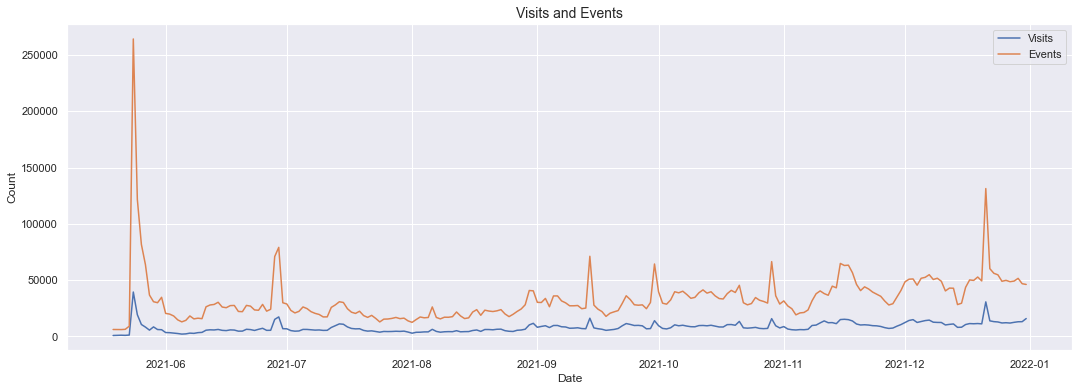

In [195]:
df_hits2 = df_hits.copy()
df_ses2 = df_ses.copy()

visits = df_ses2[['visit_date']].rename(columns={'visit_date': 'date'})
visits['event_type'] = 'visit'

events = df_hits2[['hit_date']].rename(columns={'hit_date': 'date'})
events['event_type'] = 'event'

data = pd.concat([visits, events], ignore_index=True, sort=False)

# Считаем количество визитов и событий за каждый день
grouped_data = data.groupby(['date', 'event_type']).size().reset_index(name='count')

# Создаем фильтры для визитов и событий
visits_mask = grouped_data['event_type'] == 'visit'
events_mask = grouped_data['event_type'] == 'event'

fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(grouped_data.loc[visits_mask, 'date'], grouped_data.loc[visits_mask, 'count'], label='Visits')
ax.plot(grouped_data.loc[events_mask, 'date'], grouped_data.loc[events_mask, 'count'], label='Events')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

plt.title('Visits and Events', fontsize=14)
plt.legend()
plt.show()

In [153]:
df = pd.merge(df_ses, df_hits, how='left', on='session_id')
df.head()

,session_id,visit_date,visit_time,device_category,device_os,device_browser,geo_country,geo_city,social_net,traffic_type,hit_date,event_category,event_action,target_action,auto_marka,auto_model
0,9055434745589932991.1637753792.1637753792,2021-11-24,14:36:32,mobile,android,chrome,russia,zlatoust,0,paid,2021-11-24,sub_page_view,sub_landing,0.0,other,other
1,9055434745589932991.1637753792.1637753792,2021-11-24,14:36:32,mobile,android,chrome,russia,zlatoust,0,paid,2021-11-24,sub_button_click,sub_view_cars_click,0.0,other,other
2,905544597018549464.1636867290.1636867290,2021-11-14,08:21:30,mobile,android,samsung internet,russia,moscow,1,paid,2021-11-14,sub_page_view,sub_landing,0.0,other,other
3,9055446045651783499.1640648526.1640648526,2021-12-28,02:42:06,mobile,android,chrome,russia,krasnoyarsk,0,paid,2021-12-28,search_form,search_form_region,0.0,other,other
4,9055446045651783499.1640648526.1640648526,2021-12-28,02:42:06,mobile,android,chrome,russia,krasnoyarsk,0,paid,2021-12-28,sub_page_view,sub_landing,0.0,other,other


In [154]:
shape = df.shape
print("Number of rows:", "{:,}".format(shape[0]).replace(',',' '))
print("Number of columns:", "{:,}".format(shape[1]).replace(',',' '))

Number of rows: 7 642 687
Number of columns: 16


## Дубликаты

In [156]:
duplicates = df.duplicated()
print("Number of duplicate rows:", "{:,}".format(duplicates.sum()).replace(',',' '))

Number of duplicate rows: 682 070


In [157]:
duplicated_rows = df[duplicates]
duplicated_rows

,session_id,visit_date,visit_time,device_category,device_os,device_browser,geo_country,geo_city,social_net,traffic_type,hit_date,event_category,event_action,target_action,auto_marka,auto_model
15,9055447192389856083.1622453074.1622453074,2021-05-31,12:00:00,mobile,ios,safari,russia,saint petersburg,0,organic,2021-05-31,card_web,view_card,0.0,other,other
16,9055447192389856083.1622453074.1622453074,2021-05-31,12:00:00,mobile,ios,safari,russia,saint petersburg,0,organic,2021-05-31,sub_page_view,sub_car_page,0.0,other,other
17,9055447192389856083.1622453074.1622453074,2021-05-31,12:00:00,mobile,ios,safari,russia,saint petersburg,0,organic,2021-05-31,card_web,view_new_card,0.0,other,other
55,9055469620715506713.1628883994.1628883994,2021-08-13,22:00:00,mobile,samsung,android webview,russia,saint petersburg,0,organic,2021-08-13,card_web,view_card,0.0,other,other
57,9055469620715506713.1628883994.1628883994,2021-08-13,22:00:00,mobile,samsung,android webview,russia,saint petersburg,0,organic,2021-08-13,card_web,view_new_card,0.0,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642642,9055394269810294140.1629912447.1629912447,2021-08-25,20:00:00,mobile,samsung,android webview,russia,saint petersburg,0,paid,2021-08-25,card_web,view_card,0.0,other,other
7642644,9055394269810294140.1629912447.1629912447,2021-08-25,20:00:00,mobile,samsung,android webview,russia,saint petersburg,0,paid,2021-08-25,card_web,view_card,0.0,other,other
7642645,9055394269810294140.1629912447.1629912447,2021-08-25,20:00:00,mobile,samsung,android webview,russia,saint petersburg,0,paid,2021-08-25,card_web,view_new_card,0.0,other,other
7642646,9055394269810294140.1629912447.1629912447,2021-08-25,20:00:00,mobile,samsung,android webview,russia,saint petersburg,0,paid,2021-08-25,card_web,view_new_card,0.0,other,other


In [158]:
df = df.drop_duplicates()
shape = df.shape
print("Number of rows:", "{:,}".format(shape[0]).replace(',',' '))
print("Number of columns:", "{:,}".format(shape[1]).replace(',',' '))

Number of rows: 6 960 617
Number of columns: 16


In [159]:
duplicates = df.duplicated()
print("Number of duplicate rows:", "{:,}".format(duplicates.sum()).replace(',',' '))

Number of duplicate rows: 0


## Ограничение значений

In [160]:
df['auto_marka'] = df['auto_marka'].apply(lambda x: 'other' if (type(x) == str and len(x) > 20) else x)
df['auto_model'] = df['auto_model'].apply(lambda x: 'other' if (type(x) == str and len(x) > 20) else x)

In [161]:
# проверим есть ли не строковые значения в столбце
non_string_values = df.loc[df['auto_marka'].apply(lambda x: not isinstance(x, str)), 'auto_marka'].unique()
print(non_string_values)

[nan]


In [162]:
non_string_values = df.loc[df['auto_model'].apply(lambda x: not isinstance(x, str)), 'auto_model'].unique()
print(non_string_values)

[nan]


In [163]:
# количество уникальных значений в столбце
nunique = df['auto_marka'].nunique()

# пороговое значение 1%
threshold = int(0.01 * len(df))

# выбрать значения, которые встречаются реже, чем пороговое значение
to_replace = df['auto_marka'].value_counts()[df['auto_marka'].value_counts() < threshold].index.tolist()

# заменить значения на "other"
df['auto_marka'] = df['auto_marka'].replace(to_replace, 'other')

In [164]:
df.auto_marka.value_counts()

other            5970304
skoda             256437
mercedes-benz     164533
volkswagen        144334
lada-vaz          133611
kia                83213
nissan             80409
Name: auto_marka, dtype: int64

In [165]:
# количество уникальных значений в столбце
nunique = df['auto_model'].nunique()

# пороговое значение 1%
threshold = int(0.01 * len(df))

# выбрать значения, которые встречаются реже, чем пороговое значение
to_replace = df['auto_model'].value_counts()[df['auto_model'].value_counts() < threshold].index.tolist()

# заменить значения на "other"
df['auto_model'] = df['auto_model'].replace(to_replace, 'other')

In [166]:
df.auto_model.value_counts()

other    6438282
rapid     151729
vesta     133442
polo      109388
Name: auto_model, dtype: int64

In [167]:
# количество уникальных значений в столбце
nunique = df['geo_country'].nunique()

# пороговое значение 1%
threshold = int(0.01 * len(df))

# выбрать значения, которые встречаются реже, чем пороговое значение
to_replace = df['geo_country'].value_counts()[df['geo_country'].value_counts() < threshold].index.tolist()

# заменить значения на "other"
df['geo_country'] = df['geo_country'].replace(to_replace, 'other')

In [168]:
df.geo_country.value_counts()

russia    6769160
other      191457
Name: geo_country, dtype: int64

In [169]:
# количество уникальных значений в столбце
nunique = df['geo_city'].nunique()

# пороговое значение 1%
threshold = int(0.01 * len(df))

# выбрать значения, которые встречаются реже, чем пороговое значение
to_replace = df['geo_city'].value_counts()[df['geo_city'].value_counts() < threshold].index.tolist()

# заменить значения на "other"
df['geo_city'] = df['geo_city'].replace(to_replace, 'other')

In [170]:
df.geo_city.value_counts()

moscow              2953338
other               1903382
saint petersburg    1060627
(not set)            269036
yekaterinburg        150757
krasnodar            132413
kazan                121582
samara               103347
nizhny novgorod       89882
ufa                   88482
novosibirsk           87771
Name: geo_city, dtype: int64

## NaN

In [171]:
print(df.isna().sum())

session_id              0
visit_date              0
visit_time              0
device_category         0
device_os               0
device_browser          0
geo_country             0
geo_city                0
social_net              0
traffic_type            0
hit_date           127776
event_category     127776
event_action       127776
target_action      127776
auto_marka         127776
auto_model         127776
dtype: int64


Note: 127 776 это посещения без какой-либо активности, визиты без событий, они нам не интересны в плане модели 

In [172]:
df = df.dropna()
shape = df.shape
print("Number of rows:", "{:,}".format(shape[0]).replace(',',' '))
print("Number of columns:", "{:,}".format(shape[1]).replace(',',' '))

Number of rows: 6 832 841
Number of columns: 16


In [173]:
print(df.isna().sum())

session_id         0
visit_date         0
visit_time         0
device_category    0
device_os          0
device_browser     0
geo_country        0
geo_city           0
social_net         0
traffic_type       0
hit_date           0
event_category     0
event_action       0
target_action      0
auto_marka         0
auto_model         0
dtype: int64


## Ключевые атрибуты

In [174]:
df.head()

,session_id,visit_date,visit_time,device_category,device_os,device_browser,geo_country,geo_city,social_net,traffic_type,hit_date,event_category,event_action,target_action,auto_marka,auto_model
0,9055434745589932991.1637753792.1637753792,2021-11-24,14:36:32,mobile,android,chrome,russia,other,0,paid,2021-11-24,sub_page_view,sub_landing,0.0,other,other
1,9055434745589932991.1637753792.1637753792,2021-11-24,14:36:32,mobile,android,chrome,russia,other,0,paid,2021-11-24,sub_button_click,sub_view_cars_click,0.0,other,other
2,905544597018549464.1636867290.1636867290,2021-11-14,08:21:30,mobile,android,samsung internet,russia,moscow,1,paid,2021-11-14,sub_page_view,sub_landing,0.0,other,other
3,9055446045651783499.1640648526.1640648526,2021-12-28,02:42:06,mobile,android,chrome,russia,other,0,paid,2021-12-28,search_form,search_form_region,0.0,other,other
4,9055446045651783499.1640648526.1640648526,2021-12-28,02:42:06,mobile,android,chrome,russia,other,0,paid,2021-12-28,sub_page_view,sub_landing,0.0,other,other


<AxesSubplot:>

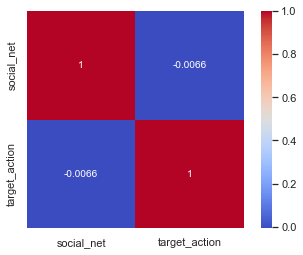

In [175]:
import seaborn as sns

# вычисление матрицы корреляций
corr_matrix = df.corr()

# построение тепловой карты
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)

Note: Никакой корреляции между фактом была ли размещена реклами в соц.сетях или нет и влиянием на целевое действия нет. 

In [176]:
import numpy as np
from scipy.stats import chi2_contingency

# Для подсчета корреляции между качественной и числовой переменной можно использовать коэффициент корреляции Крамера.

# Коэффициент корреляции Крамера возвращает значение между 0 и 1, 
# где 0 означает отсутствие корреляции, а 1 - полную корреляцию. 
# Чем ближе значение к 1, тем сильнее корреляция между качественной и числовой переменными. 
# P-value показывает, насколько статистически значима корреляция. 
# Если p-value меньше заданного уровня значимости (обычно 0.05), 
# то можно считать корреляцию статистически значимой.

def phi_cramer(data_str, data_int):
    # создаем таблицу сопряженности
    contingency_table = pd.crosstab(data_str, data_int)
    # вычисляем коэффициент корреляции Крамера и p-value
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi_cramer = np.sqrt(chi2 / (n*(min(contingency_table.shape)-1)))

    return phi_cramer, p_value, dof, expected


In [177]:
key_atr_arr = ['geo_country', 'geo_city', 'traffic_type', 'auto_marka', 'auto_model',
             'device_category', 'event_action']

for key_atr in key_atr_arr:
    phi = phi_cramer(df[key_atr], df['target_action'])
    cramer = phi[0]
    p_value = phi[1]
    print(f"Корреляция м/д {key_atr} и TARGET_ACTION: {'{:.4f}'.format(cramer)}")
    print(f"P-value для корреляции {key_atr}: {'{:.4f}'.format(p_value)}")

Корреляция м/д geo_country и TARGET_ACTION: 0.0048
P-value для корреляции geo_country: 0.0000
Корреляция м/д geo_city и TARGET_ACTION: 0.0168
P-value для корреляции geo_city: 0.0000
Корреляция м/д traffic_type и TARGET_ACTION: 0.0009
P-value для корреляции traffic_type: 0.0167
Корреляция м/д auto_marka и TARGET_ACTION: 0.0500
P-value для корреляции auto_marka: 0.0000
Корреляция м/д auto_model и TARGET_ACTION: 0.0495
P-value для корреляции auto_model: 0.0000
Корреляция м/д device_category и TARGET_ACTION: 0.0030
P-value для корреляции device_category: 0.0000
Корреляция м/д event_action и TARGET_ACTION: 1.0000
P-value для корреляции event_action: 0.0000


Note:
1. Столбец event_action я использовал скорее для проверки: так как целевая переменная строилась именно по этому признаку, то
корреляция должна быть абсолютной, а статистическая значимость нулевая. Что и требовалось доказать.
2. Проверим зависимости в переменных еще одним способом...

<AxesSubplot:>

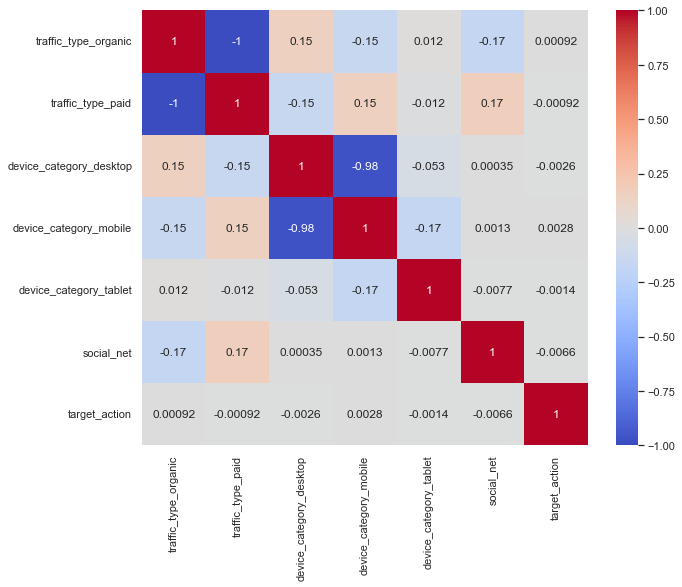

In [178]:
# выбрать необходимые столбцы
df_subset = df[['traffic_type', 'device_category', 'social_net','target_action']]

# выполнить кодирование дамми-переменных для нечисловых столбцов
df_subset_encoded = pd.get_dummies(df_subset[['traffic_type', 'device_category']])

# добавить закодированные столбцы в DataFrame
df_subset_encoded[['social_net','target_action']] = df_subset[['social_net','target_action']]

# вычислить корреляционную матрицу
corr_matrix = df_subset_encoded.corr()

# настроить размер графика
sns.set(rc={'figure.figsize':(10,8)})

# построить тепловую карту корреляций
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

Note: 

## Распределения ключевых атрибутов

In [179]:
df.geo_country.value_counts()

russia    6651018
other      181823
Name: geo_country, dtype: int64

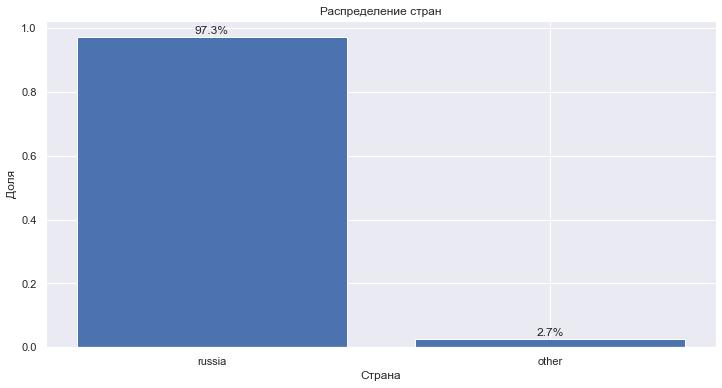

In [180]:
# создаем список значений без "other"
values = df['geo_country'].values

# считаем количество значений каждого типа
value_counts = pd.Series(values).value_counts(normalize=True)

# строим гистограмму
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(value_counts.index, value_counts.values)

# добавляем подписи к осям и заголовок графика
ax.set_xlabel('Страна')
ax.set_ylabel('Доля')
ax.set_title('Распределение стран')

# отображаем значения в процентах на графике
for i, v in enumerate(value_counts.values):
    ax.text(i, v + 0.01, '{:.1f}%'.format(v * 100), ha='center')

plt.show()

In [181]:
df.geo_city.value_counts()

moscow              2898937
other               1865179
saint petersburg    1042241
(not set)            264161
yekaterinburg        148524
krasnodar            130430
kazan                119740
samara               101788
nizhny novgorod       88437
ufa                   87086
novosibirsk           86318
Name: geo_city, dtype: int64

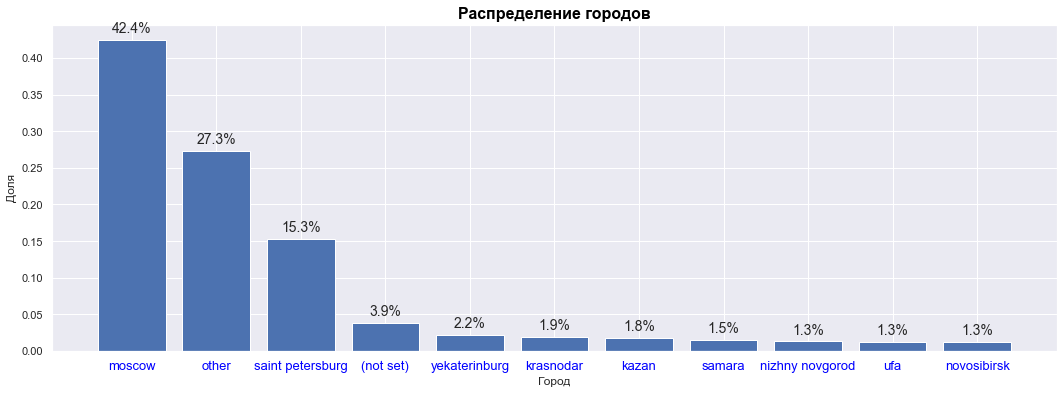

In [182]:
# создаем список значений без "other"
values = df['geo_city'].values

# считаем количество значений каждого типа
value_counts = pd.Series(values).value_counts(normalize=True)

# строим гистограмму
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(value_counts.index, value_counts.values)

# добавляем подписи к осям и заголовок графика
ax.set_xlabel('Город')
ax.set_ylabel('Доля')
ax.set_title('Распределение городов', fontname="Arial", fontsize=16, color="black", fontweight='bold')

# отображаем значения в процентах на графике
for i, v in enumerate(value_counts.values):
    ax.text(i, v + 0.01, '{:.1f}%'.format(v * 100), ha='center', fontsize=14)

plt.xticks(fontname="Arial", fontsize=13, color="blue")
plt.show()

In [183]:
df.traffic_type.value_counts()

paid       5222124
organic    1610717
Name: traffic_type, dtype: int64

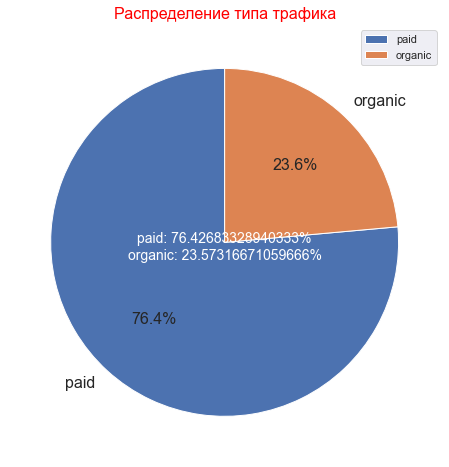

In [184]:
import matplotlib.font_manager as fm

# подсчет количества уникальных значений
counts = df['traffic_type'].value_counts()

# вычисление процентного соотношения
percentages = counts * 100 / len(df)

fig, ax = plt.subplots()
plt.title("Распределение типа трафика", fontname="Arial", fontsize=16, color="red")
ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
ax.legend(loc='upper right')

# выбираем шрифт
prop = fm.FontProperties(family='Arial', size=16 )

# изменяем шрифт для значений на графике
for text in ax.texts:
    text.set_fontproperties(prop)

# Добавление процентов на график
for i, label in enumerate(percentages.index):
    ax.text(0, 0-(i*0.1), f"{label}: {percentages[i]}%", fontsize=14, color='white', ha='center')

plt.show()


In [185]:
df.device_category.value_counts()

mobile     5158490
desktop    1613496
tablet       60855
Name: device_category, dtype: int64

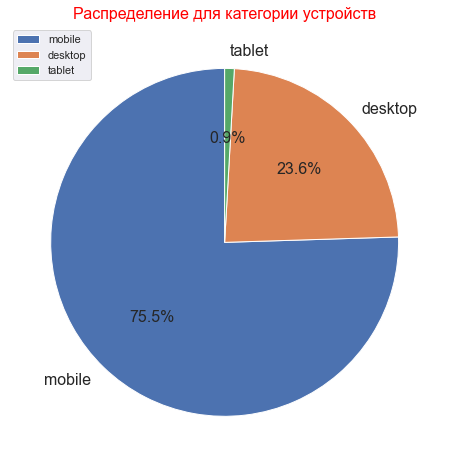

In [186]:
# подсчет количества уникальных значений
counts = df['device_category'].value_counts()

# вычисление процентного соотношения
percentages = counts * 100 / len(df)

# построение круговой диаграммы
fig, ax = plt.subplots()
plt.title("Распределение для категории устройств", fontname="Arial", fontsize=16, color="red")
ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
ax.legend(loc='best')

# выбираем шрифт
prop = fm.FontProperties(family='Arial', size=16 )

# изменяем шрифт для значений на графике
for text in ax.texts:
    text.set_fontproperties(prop)

plt.show()

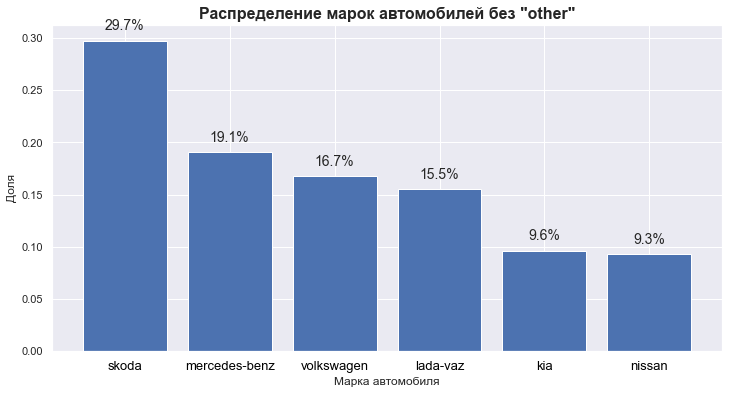

In [187]:
# создаем список значений без "other"
values = df.loc[df['auto_marka'] != 'other', 'auto_marka'].values

# считаем количество значений каждого типа
value_counts = pd.Series(values).value_counts(normalize=True)

# строим гистограмму
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(value_counts.index, value_counts.values)

# добавляем подписи к осям и заголовок графика
ax.set_xlabel('Марка автомобиля')
ax.set_ylabel('Доля')
ax.set_title('Распределение марок автомобилей без "other"', fontsize=16, fontweight='bold')

# отображаем значения в процентах на графике
for i, v in enumerate(value_counts.values):
    ax.text(i, v + 0.01, '{:.1f}%'.format(v * 100), ha='center', fontsize=14)

plt.xticks(fontname="Arial", fontsize=13, color="black")
plt.show()

In [188]:
df.auto_model.value_counts()

other    6438282
rapid     151729
vesta     133442
polo      109388
Name: auto_model, dtype: int64

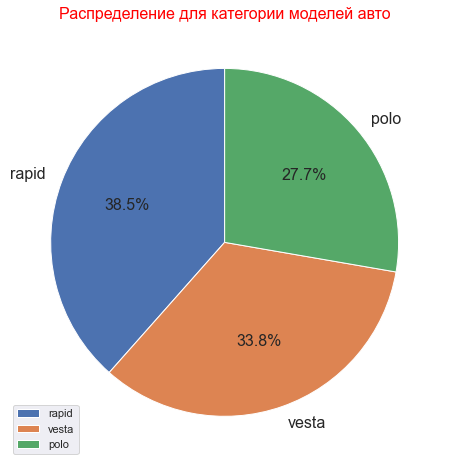

In [189]:
# подсчет количества уникальных значений
counts = df.loc[df['auto_model'] != 'other', 'auto_model'].value_counts()
#values = df.loc[df['auto_marka'] != 'other', 'auto_marka'].values
# вычисление процентного соотношения
percentages = counts * 100 / len(df)

# построение круговой диаграммы
fig, ax = plt.subplots()
plt.title("Распределение для категории моделей авто", fontname="Arial", fontsize=16, color="red")
ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
ax.legend(loc='best')

# выбираем шрифт
prop = fm.FontProperties(family='Arial', size=16)

# изменяем шрифт для значений на графике
for text in ax.texts:
    text.set_fontproperties(prop)

plt.show()